In [1]:
from SampleConverter import SampleConverter
from plotting import plot_frequency_distribution
import chess 

##CHOOSE FILE TO IMPORT
PATH = "E:/HAW/Master/Grundprojekt/project/dataset/"
FILE = "03_sorted_1665.txt" 
WHITE = True 
BLACK = False


sampleConv = SampleConverter()
sampleConv.read_dataset(PATH + FILE)
print("DONE")

sampleConv.total_games

DONE


56

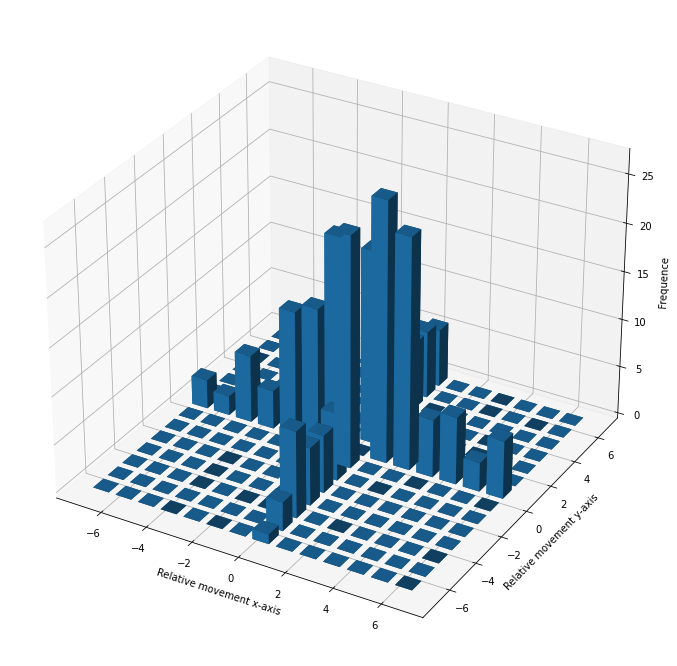

In [2]:
plot_frequency_distribution(sampleConv.dataset, [WHITE,BLACK], chess.ROOK, [chess.A8, chess.H8, chess.A1, chess.H1])

In [3]:
'''
    ##Hyperparameters
    num_iterations = 200 # 

    initial_collect_steps = 10  # 
    collect_steps_per_iteration =   1# 
    replay_buffer_max_length = 1000  # 

    batch_size = 64  # 
    learning_rate = 1e-3  # 
    log_interval = 200  # 

    num_eval_episodes = 10  # 
    eval_interval = 1000  # 
'''

'\n    ##Hyperparameters\n    num_iterations = 200 # \n\n    initial_collect_steps = 10  # \n    collect_steps_per_iteration =   1# \n    replay_buffer_max_length = 1000  # \n\n    batch_size = 64  # \n    learning_rate = 1e-3  # \n    log_interval = 200  # \n\n    num_eval_episodes = 10  # \n    eval_interval = 1000  # \n'

In [5]:
from DQN import DQN

class ChessEnvironment: 
    def __init__(self, dataset:list, min_appear:float) -> None:
        self.board = chess.Board() 
        
        #TODO representation of state space 8x8 matrix with id for each piece, für network
        #immer flatten
        #wie darstellen?
        self.state_size = 64
        
        self.dataset = dataset 
        self.min_appear = min_appear
        
        black_pieces = {
        chess.ROOK:{    chess.A8: {"actions":[], "q_net_target":None, "q_net":None},  #Rook R
                        chess.H8: {"actions":[], "q_net_target":None, "q_net":None}}, #Rook L
        chess.KNIGHT:{  chess.B8: {"actions":[], "q_net_target":None, "q_net":None},  #Knight R
                        chess.G8: {"actions":[], "q_net_target":None, "q_net":None}}, #Knight L 
        chess.BISHOP:{  chess.C8: {"actions":[], "q_net_target":None, "q_net":None},  #Bishop L
                        chess.F8: {"actions":[], "q_net_target":None, "q_net":None}}, #Bishop R
        chess.KING:{    chess.E8: {"actions":[], "q_net_target":None, "q_net":None}}, #King  
        chess.QUEEN:{   chess.D8: {"actions":[], "q_net_target":None, "q_net":None}}, #Queen
        chess.PAWN:{    chess.A7: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 1
                        chess.B7: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 2
                        chess.C7: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 3
                        chess.D7: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 4
                        chess.E7: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 5
                        chess.F7: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 6 
                        chess.G7: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 7
                        chess.H7: {"actions":[], "q_net_target":None, "q_net":None}}}  #Pawn 8
        white_pieces = {
        chess.ROOK:{    chess.A1: {"actions":[], "q_net_target":None, "q_net":None},  #Rook R
                        chess.H1: {"actions":[], "q_net_target":None, "q_net":None}}, #Rook L
        chess.KNIGHT:{  chess.B1: {"actions":[], "q_net_target":None, "q_net":None},  #Knight R
                        chess.G1: {"actions":[], "q_net_target":None, "q_net":None}}, #Knight L 
        chess.BISHOP:{  chess.C1: {"actions":[], "q_net_target":None, "q_net":None},  #Bishop L
                        chess.F1: {"actions":[], "q_net_target":None, "q_net":None}}, #Bishop R
        chess.KING:{    chess.E1: {"actions":[], "q_net_target":None, "q_net":None}}, #King  
        chess.QUEEN:{   chess.D1: {"actions":[], "q_net_target":None, "q_net":None}},  #Queen
        chess.PAWN:{    chess.A2: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 1
                        chess.B2: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 2
                        chess.C2: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 3
                        chess.D2: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 4
                        chess.E2: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 5
                        chess.F2: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 6 
                        chess.G2: {"actions":[], "q_net_target":None, "q_net":None},  #Pawn 7
                        chess.H2: {"actions":[], "q_net_target":None, "q_net":None}}}  #Pawn 8
        self.agents = {chess.WHITE : white_pieces, chess.BLACK: black_pieces}
        
        #setup action spaces, q-net and q-net-targets
        self.setup_agents()
        
        #action_space is a list of the number of possible actions, they are "Discrete(len(list))", then sample() is callable 
        #action_space[x].action_space.n
        self.action_space[32] = self.get_action_space(self.dataset) #hold an action space for each agent 
        
        #TODO: better name, this refers to the actions that indiziert 
        self.actions[32]
        
        #self.corrective = 
    
        
    def setup_agents(self): 
        '''
        Calculates each action space and sets up all Q-nets and Q-Target nets
        '''
        for is_white in [True, False]: 
            for piece_type in [chess.ROOK, chess.KNIGHT, chess.BISHOP, chess.KING, chess.QUEEN, chess.PAWN]: 
                for original_startpos in sampleConv.dataset[is_white][piece_type]: 
                    x = y = []
                    for i in range(0,len(sampleConv.dataset[is_white][piece_type][original_startpos][1])):
                        x+= [sampleConv.dataset[is_white][piece_type][original_startpos][1][i][0][0]]
                        y+= [sampleConv.dataset[is_white][piece_type][original_startpos][1][i][0][1]]
                        hist, _, _ = np.histogram2d(x, y, bins=14, range=[[-7, 7], [-7, 7]])
                        action_space = self.__get_action_space(hist)
                        self.agents[is_white][piece_type][original_startpos]["actions"] = action_space
                        action_size = len(action_space)
                        
                        #set q-network
                        q_net = DQN(self.state_size,action_size)
                        self.agents[is_white][piece_type][original_startpos]["q_net"] = q_net
                        
                        #create identical copy 
                        q_net_target = DQN(self.state_size,action_size)
                        q_net_target.model.set_weights(q_net.model.get_weights())
                        self.agents[is_white][piece_type][original_startpos]["q_net_target"] = q_net_target
                        
                        #TODO wie würde ein Replaybuffer in MARL funktionieren?
                        
                        
    #generate an action space, depening on topborder
    #TODO check if rotate 90degrees
    def __get_action_space(self, hist):
        action_space = []
        for x in range(0,len(hist)): 
            for y in range(0,len(hist[0])): 
                if hist[x][y] >= self.min_appear:
                    action_space += [(x,y)]
        return action_space

    def reset(self): 
        return None 
    
    def step(self, action:tuple) -> tuple: 
        return (next_state, reward, done, info) 
    
    def train_model(self): 
        #training loop
        #setup game
            #determine turn
            #sample an action (consider exploration) for each piece type in team
            #vote on action 
            #check if action is allowed (if not repeat until it is, if all 16 chose invalid action, end game? negative rew or take second highest?)
            #perform action 
                #determine state, reward, done flag
            #update networks etc. 
            #repeat if it is not game over
    
    
#Replaybuffer? 
        

IndentationError: expected an indented block (Temp/ipykernel_12496/4074482653.py, line 125)

In [ ]:
#Einen Agenten erstellen 
